In [41]:
from labvision import camera, images
import numpy as np

from labequipment import shaker
import matplotlib.pyplot as plt

In [2]:
cam = camera.Camera()

In [13]:
my_shaker = shaker.Shaker()

port opened
port opened
Serial control enabled.



In [4]:
frame = cam.get_frame()

In [6]:
images.display(frame)

In [7]:
crop_result = images.crop_polygon(frame)

In [11]:
hex_ = crop_result.points
crop = crop_result.bbox
mask = crop_result.mask
center = np.mean(hex_, axis=0)

In [33]:
frame = cam.get_frame()

In [34]:
frame = images.crop_and_mask(frame, crop, mask, mask_color='white')
frame = images.bgr_to_gray(frame)

In [35]:
images.CircleGui(frame)

In [25]:
frame = images.threshold(frame, 100)

In [27]:
center = images.center_of_mass(frame)

In [28]:
frame_annotated = images.draw_circle(images.gray_to_bgr(frame), center[0], center[1], 10)

In [29]:
images.display(frame_annotated)

In [32]:
images.CircleGui(frame)

In [37]:
circles = images.find_circles(frame, 11, 235, 3, 6, 7)

In [43]:
colors = []
for x, y, r in circles:
    x, y, r = int(x), int(y), int(r)
    circle = frame[y-r:y+r, x-r:x+r]
    colors.append(np.mean(circle))

(array([ 1.,  0.,  1.,  2.,  2.,  5.,  4.,  3.,  7.,  8., 11.,  6.,  7.,
        13., 15., 20., 16., 21., 25., 32., 31., 28., 34., 27., 39., 38.,
        44., 43., 43., 36., 42., 47., 50., 33., 45., 36., 39., 50., 47.,
        54., 42., 32., 46., 33., 36., 43., 23., 37., 29., 35., 29., 32.,
        22., 27., 28., 32., 24., 18., 21., 19., 16., 16., 16., 17., 17.,
         9., 18., 16., 10.,  7.,  9.,  5.,  8.,  7.,  6.,  4.,  4.,  7.,
         6.,  5.,  3.,  7.,  8.,  1.,  4.,  5.,  2.,  1.,  4.,  5.,  4.,
         3.,  3.,  5.,  2.,  4.,  2.,  3.,  4.,  2.,  4.,  1.,  2.,  2.,
         2.,  2.,  3.,  6.,  1.,  2.,  6.,  4.,  0.,  4.,  5.,  2.,  5.,
         1.,  1.,  1.,  3.,  2.,  2.,  2.,  4.,  3.,  3.,  2.,  3.,  2.,
         3.,  2.,  1.,  7.,  3.,  1.,  2.,  1.,  3.,  1.,  3.,  1.,  2.,
         3.,  6.,  1.,  2.,  3.,  8.,  2.,  2.,  1.,  5.,  1.,  3.,  3.,
         4.,  3.,  1.,  2.,  5.,  5.,  4.,  6.,  2.,  4.,  2.,  4.,  0.,
         2.,  3.,  4.,  7.,  4.,  1.,  4.,  8.,  1.

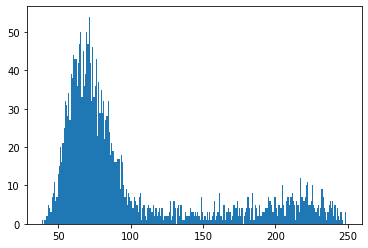

In [46]:
plt.hist(colors, bins=255)

In [50]:
circles = circles[np.array(colors) <120, :]

In [52]:
im_annotated = images.draw_circles(images.gray_to_bgr(frame), circles)

In [61]:
images.display(im_annotated)

In [54]:
circle_center = np.mean(circles, axis=0)

In [60]:
im_annotated = images.draw_circle(im_annotated, circle_center[0], circle_center[1], 20, color=images.RED)